<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_12/02_pca_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA


<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
472,0,119,66,27,0,38.8,0.259,22,0
621,2,92,76,20,0,24.2,1.698,28,0
34,10,122,78,31,0,27.6,0.512,45,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# splite the data 
X = df.drop(columns = 'Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

Text(0.5, 0, '')

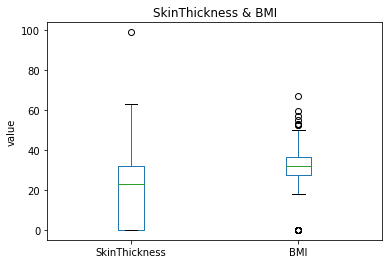

In [5]:
#EDA
df[['SkinThickness','BMI']].plot.box();
plt.title("SkinThickness & BMI")
plt.ylabel("value")
plt.xlabel("")

Explanation : the plot box chart shows the minumum , maximum ,and outlier values for the skin thickness and BMI volume. it is ilustrate that the BMI has many outliers (which means far away from the other points) in 45 and above. 

Text(0.5, 0, 'Age of patients')

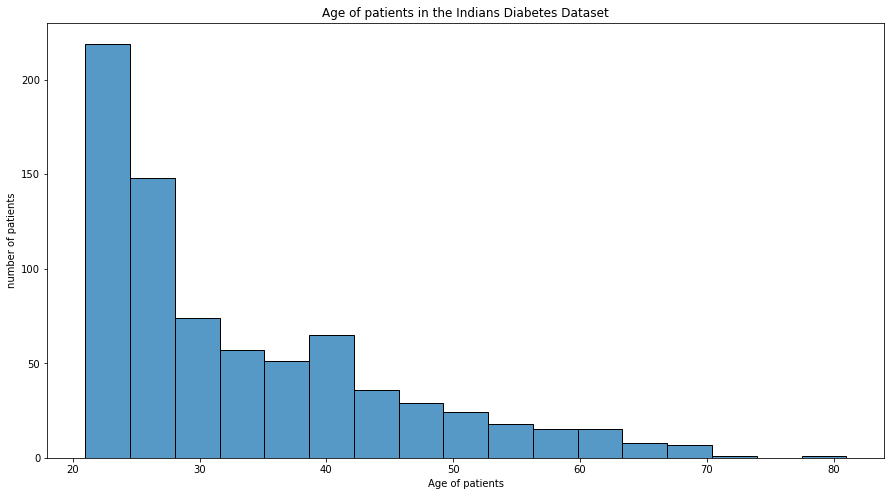

In [6]:
#Histogram chart
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Age')
plt.title("Age of patients in the Indians Diabetes Dataset")
plt.ylabel("number of patients")
plt.xlabel("Age of patients")

In [7]:
# First quartile (Q1)
Q1 = np.percentile(df['BMI'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(df['BMI'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

# lower bound outliers --> Q1 - 1.5(IQR)
# higher bound outliers --> Q3 + 1.5 (IQR)


print(Q3+ 1.5*(IQR))

50.550000000000004


In [8]:
# First quartile (Q1)
Q1 = np.percentile(df['BMI'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(df['BMI'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

# lower bound outliers --> Q1 - 1.5(IQR)
# higher bound outliers --> Q3 + 1.5 (IQR)


print(Q1 -1.5*(IQR))

13.35


In [9]:
# First quartile (Q1)
Q1 = np.percentile(df['SkinThickness'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(df['SkinThickness'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

# lower bound outliers --> Q1 - 1.5(IQR)
# higher bound outliers --> Q3 + 1.5 (IQR)


print(Q3+ 1.5*(IQR))

80.0


In [10]:
#Dropping the outliers from column
df=df.drop(df[df['BMI']>50.55 ].index)

In [11]:
#Dropping the outliers from column
df=df.drop(df[df['BMI']<13.5 ].index)

In [12]:
#Dropping the outliers from column
df=df.drop(df[df['SkinThickness']>80 ].index)

Text(0.5, 0, '')

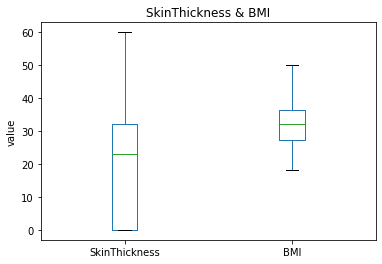

In [13]:
#after droping the outliers 
df[['SkinThickness','BMI']].plot.box();
plt.title("SkinThickness & BMI")
plt.ylabel("value")
plt.xlabel("")

Explanation : the graph shows that the diabetes patients are 21 years old and older. and most of the data in range of 21- 40 . 

In [25]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [27]:
#Logistic Regression 
logreg = LogisticRegression(max_iter=2085)
logreg.fit(X_train_sc, y_train)
print('Training accuracy:', logreg.score(X_train_sc, y_train))
print('Testing accuracy:', logreg.score(X_test_sc, y_test))

Training accuracy: 0.7951388888888888
Testing accuracy: 0.734375


In [28]:
#baseline model 
print(f"basline : \n{df['Outcome'].value_counts(normalize=True)}")

basline : 
0    0.653743
1    0.346257
Name: Outcome, dtype: float64


In [31]:
pred = logreg.predict(X_test_sc)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       112
           1       0.75      0.55      0.63        80

    accuracy                           0.73       192
   macro avg       0.74      0.71      0.71       192
weighted avg       0.74      0.73      0.73       192



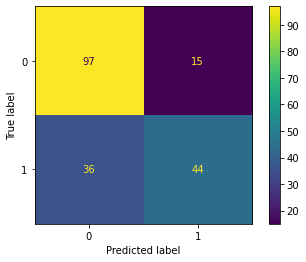

In [32]:
plot_confusion_matrix(logreg,X_test_sc, y_test)
plt.grid(False);

Compare the result to the baseline model:
in basline 65% of the data is in class0 , 34% of the data in class 1. The accuracy we got is 73% which is higher than the basline model 

In [33]:
# PCA 
pca = PCA(n_components =5)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [34]:
# Using PCA for Logistic regression model
logreg_PCA = LogisticRegression()
logreg_PCA.fit(X_train_pca,y_train)

print('Training accuracy:', logreg_PCA.score(X_train_pca, y_train))
print('Testing accuracy:', logreg_PCA.score(X_test_pca, y_test))

Training accuracy: 0.7621527777777778
Testing accuracy: 0.6770833333333334


In [35]:
# Measure how long it takes to train without PCA

%timeit logreg.fit(X_train, y_train)

84.3 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
# Measure how long it takes to train with PCA

%timeit logreg_PCA.fit(X_train_pca, y_train)

6.76 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
84.3 -6.76 

77.53999999999999

Compare the results:
Timing : we got less time for training using logistic regression with PCA. with difference is 77.5 ms.
Testing accuracy: we got the best accuracy 73% using logistic regression without PCA.
we conclude that for this case the number of the columns is 8 , when we reduced the number of columns the accuracy of the model is also reduced . which means we lose some of the information by using the pca. 

# BONUS - Scree Plot 

In [38]:
pd.Series(pca.explained_variance_ratio_) 

0    0.261243
1    0.224876
2    0.129441
3    0.109941
4    0.093459
dtype: float64

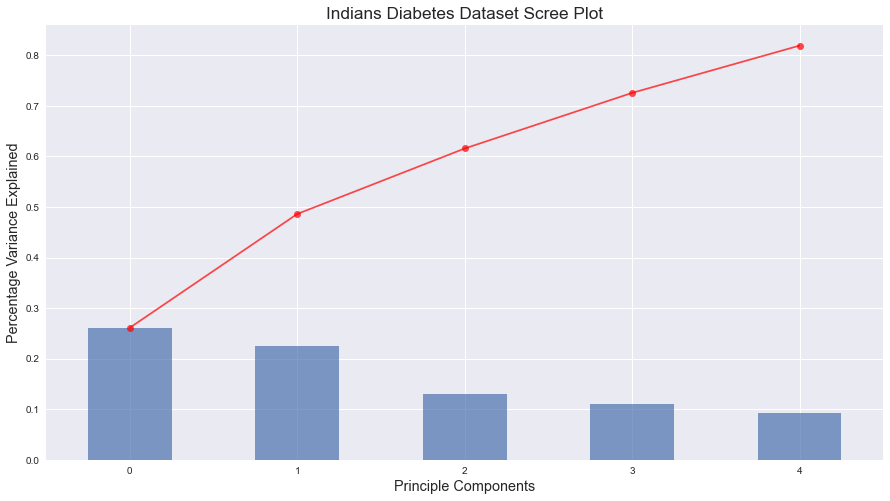

In [39]:
plt.style.use("seaborn")
plt.figure(figsize=(15,8))

exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7, color = 'red' ) #plot line chart of increasing variances

plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Indians Diabetes Dataset Scree Plot", fontsize="xx-large")
plt.show();